In [1]:
import tensorflow as tf
import tensornets as nets
import cv2

import numpy as np
import matplotlib.pyplot as plt

In [2]:
config = tf.ConfigProto(
        device_count = {'GPU': 0}
    )

In [3]:


inputs = tf.placeholder(tf.float32, [None, 416, 416, 3])
model = nets.YOLOv2(inputs, nets.Darknet19)

img = nets.utils.load_img('shelf_images/IMG_20190213_020829.jpg')
#img = nets.utils.load_img('cat_png.png')

with tf.Session(config=config) as sess:
    sess.run(model.pretrained())
    preds = sess.run(model, {inputs: model.preprocess(img)})
    boxes = model.get_boxes(preds, img.shape[1:3])


In [4]:
boxes

[array([], dtype=float32),
 array([], dtype=float32),
 array([], dtype=float32),
 array([], dtype=float32),
 array([], dtype=float32),
 array([], dtype=float32),
 array([], dtype=float32),
 array([], dtype=float32),
 array([], dtype=float32),
 array([], dtype=float32),
 array([], dtype=float32),
 array([], dtype=float32),
 array([], dtype=float32),
 array([], dtype=float32),
 array([], dtype=float32),
 array([], dtype=float32),
 array([], dtype=float32),
 array([], dtype=float32),
 array([], dtype=float32),
 array([[2.7500000e+02, 1.0000000e+03, 3.2250000e+03, 2.2110000e+03,
         1.2855692e-01]], dtype=float32)]

In [5]:
from tensornets.datasets import voc
print("%s: %s" % (voc.classnames[7], boxes[7][0]))  # 7 is cat

box = boxes[7][0]
plt.imshow(img[0].astype(np.uint8))
plt.gca().add_patch(plt.Rectangle(
    (box[0], box[1]), box[2] - box[0], box[3] - box[1],
    fill=False, edgecolor='r', linewidth=2))
plt.show()

IndexError: index 0 is out of bounds for axis 0 with size 0

[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[[2.7500000e+02 1.0000000e+03 3.2250000e+03 2.2110000e+03 1.2855692e-01]]


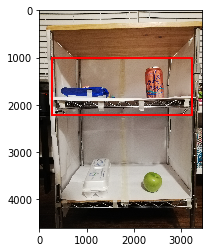

In [10]:
plt.imshow(img[0].astype(np.uint8))
for box in boxes:
    print(box)
    if box.shape != (0,):
        box = box[0]
        plt.gca().add_patch(plt.Rectangle(
            (box[0], box[1]), box[2] - box[0], box[3] - box[1],
            fill=False, edgecolor='r', linewidth=2))
plt.show()